# Lab 9 - Decision Trees

In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
import math

### Q1 

In [17]:
def entropy(data, target_attr):
    val_freq = {}
    data_entropy = 0.0

    for record in data:
        if record[target_attr] in val_freq:
            val_freq[record[target_attr]] += 1.0
        else:
            val_freq[record[target_attr]] = 1.0

    for freq in val_freq.values():
        data_entropy += (-freq / len(data)) * math.log2(freq / len(data))

    return data_entropy

def gain(data, attr, target_attr):
    val_freq = {}
    subset_entropy = 0.0

    
    for record in data:
        if record[attr] in val_freq:
            val_freq[record[attr]] += 1.0
        else:
            val_freq[record[attr]] = 1.0

    for val in val_freq.keys():
        val_prob = val_freq[val] / sum(val_freq.values())
        subset_data = [record for record in data if record[attr] == val]
        subset_entropy += val_prob * entropy(subset_data, target_attr)

    return entropy(data, target_attr) - subset_entropy

def majority_value(data, target_attr):
    val_freq = {}
    for record in data:
        if record[target_attr] in val_freq:
            val_freq[record[target_attr]] += 1
        else:
            val_freq[record[target_attr]] = 1
    return max(val_freq, key=val_freq.get)

def c45_tree(data, attributes, target_attr, default_class=None):
    if not data:
        return default_class
    elif len(set([record[target_attr] for record in data])) == 1:
        return data[0][target_attr]
    elif not attributes:
        return majority_value(data, target_attr)
    else:
        best_attr = max(attributes, key=lambda attr: gain(data, attr, target_attr))
        tree = {best_attr: {}}

        for val in set([record[best_attr] for record in data]):
            subset = [record for record in data if record[best_attr] == val]
            subtree = c45_tree(subset, [attr for attr in attributes if attr != best_attr], target_attr, majority_value(data, target_attr))
            tree[best_attr][val] = subtree

        return tree


In [18]:
def gini(data, target_attr):
    val_freq = {}
    gini_index = 0.0

    for record in data:
        if record[target_attr] in val_freq:
            val_freq[record[target_attr]] += 1.0
        else:
            val_freq[record[target_attr]] = 1.0

    for freq in val_freq.values():
        gini_index += (freq / len(data)) ** 2

    return 1 - gini_index

def cart_split(data, attr, target_attr):
    val_freq = {}
    subset_gini = 0.0

    for record in data:
        if record[attr] in val_freq:
            val_freq[record[attr]] += 1.0
        else:
            val_freq[record[attr]] = 1.0

    for val in val_freq.keys():
        val_prob = val_freq[val] / sum(val_freq.values())
        subset_data = [record for record in data if record[attr] == val]
        subset_gini += val_prob * gini(subset_data, target_attr)

    return gini(data, target_attr) - subset_gini

def cart_tree(data, attributes, target_attr, default_class=None):
    if not data:
        return default_class
    elif len(set([record[target_attr] for record in data])) == 1:
        return data[0][target_attr]
    elif not attributes:
        return majority_value(data, target_attr)
    else:
        best_attr = max(attributes, key=lambda attr: cart_split(data, attr, target_attr))
        tree = {best_attr: {}}

        for val in set([record[best_attr] for record in data]):
            subset = [record for record in data if record[best_attr] == val]
            subtree = cart_tree(subset, [attr for attr in attributes if attr != best_attr], target_attr, majority_value(data, target_attr))
            tree[best_attr][val] = subtree

        return tree


In [19]:
data = [
    {'Outlook': 'Sunny', 'Temp.': 85, 'Humidity': 85, 'Wind': 'Weak', 'Decision': 'No'},
    {'Outlook': 'Sunny', 'Temp.': 80, 'Humidity': 90, 'Wind': 'Strong', 'Decision': 'No'},
    {'Outlook': 'Overcast', 'Temp.': 83, 'Humidity': 78, 'Wind': 'Weak', 'Decision': 'Yes'},
    {'Outlook': 'Rain', 'Temp.': 70, 'Humidity': 96, 'Wind': 'Weak', 'Decision': 'Yes'},
    {'Outlook': 'Rain', 'Temp.': 68, 'Humidity': 80, 'Wind': 'Weak', 'Decision': 'Yes'},
    {'Outlook': 'Rain', 'Temp.': 65, 'Humidity': 70, 'Wind': 'Strong', 'Decision': 'No'},
    {'Outlook': 'Overcast', 'Temp.': 64, 'Humidity': 65, 'Wind': 'Strong', 'Decision': 'Yes'},
    {'Outlook': 'Sunny', 'Temp.': 72, 'Humidity': 95, 'Wind': 'Weak', 'Decision': 'No'},
    {'Outlook': 'Sunny', 'Temp.': 69, 'Humidity': 70, 'Wind': 'Weak', 'Decision': 'Yes'},
    {'Outlook': 'Rain', 'Temp.': 75, 'Humidity': 80, 'Wind': 'Weak', 'Decision': 'Yes'},
    {'Outlook': 'Sunny', 'Temp.': 75, 'Humidity': 70, 'Wind': 'Strong', 'Decision': 'Yes'},
    {'Outlook': 'Overcast', 'Temp.': 72, 'Humidity': 90, 'Wind': 'Strong', 'Decision': 'Yes'},
    {'Outlook': 'Overcast', 'Temp.': 81, 'Humidity': 75, 'Wind': 'Weak', 'Decision': 'Yes'},
    {'Outlook': 'Rain', 'Temp.': 71, 'Humidity': 80, 'Wind': 'Strong', 'Decision': 'No'}
]

attributes = ['Outlook', 'Temp.', 'Humidity', 'Wind']
target_attr = 'Decision'

c45_model = c45_tree(data, attributes, target_attr)
cart_model = cart_tree(data, attributes, target_attr)

print("C4.5 Decision Tree:", c45_model)

C4.5 Decision Tree: {'Temp.': {64: 'Yes', 65: 'No', 68: 'Yes', 69: 'Yes', 70: 'Yes', 71: 'No', 72: {'Outlook': {'Sunny': 'No', 'Overcast': 'Yes'}}, 75: 'Yes', 80: 'No', 81: 'Yes', 83: 'Yes', 85: 'No'}}


In [20]:
def classify(tree, sample):
    if not isinstance(tree, dict):
        return tree
    attr = next(iter(tree))
    val = sample[attr]
    subtree = tree[attr].get(val, None)
    if subtree is None:
        return "Unknown"
    return classify(subtree, sample)

new_sample = {'Outlook': 'Sunny', 'Temp.': 75, 'Humidity': 70, 'Wind': 'weak'}
print("C4.5 Classification:", classify(c45_model, new_sample))
print("CART Classification:", classify(cart_model, new_sample))


C4.5 Classification: Yes
CART Classification: Yes


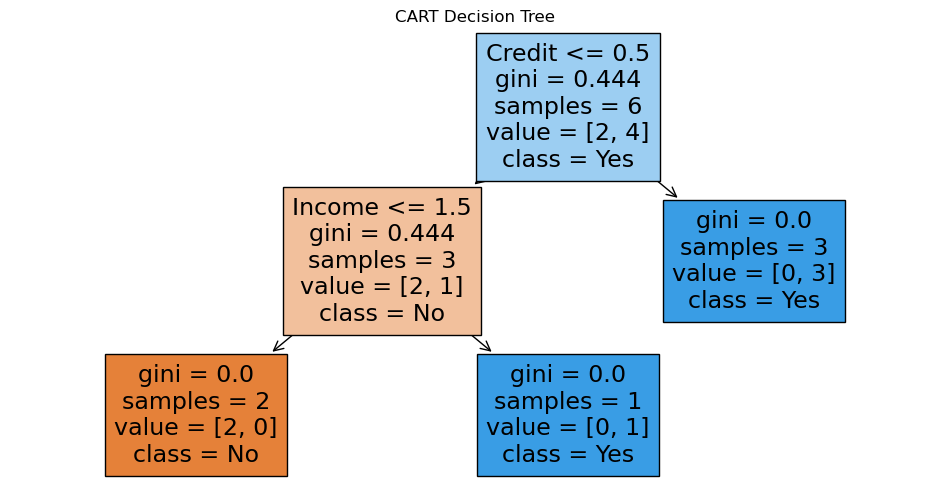

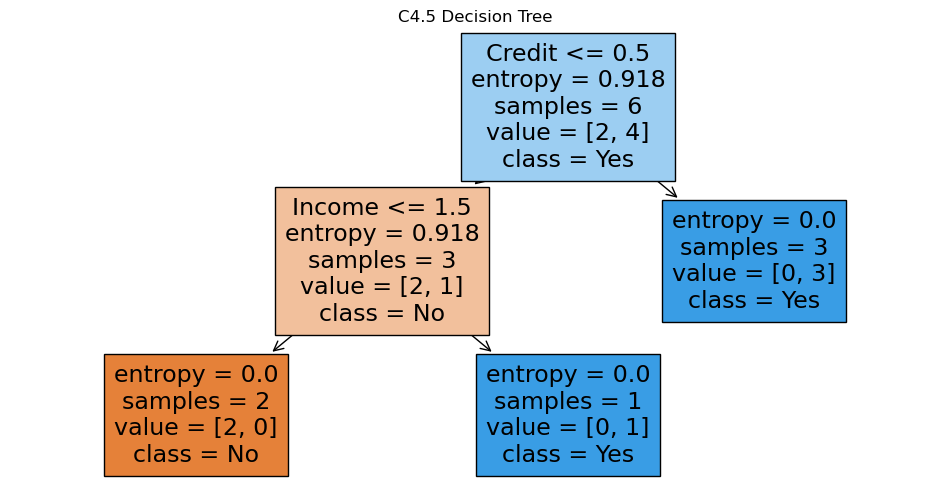

CART Prediction for {'Income': {0: 'Medium'}, 'Credit': {0: 'Good'}}: Yes
C4.5 Prediction for {'Income': {0: 'Medium'}, 'Credit': {0: 'Good'}}: Yes


In [21]:
data = {
    'Income': ['Low', 'Low', 'Medium', 'Medium', 'High', 'High'],
    'Credit': ['Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad'],
    'Loan Approved': ['Yes', 'No', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df[['Income', 'Credit']]
y = df['Loan Approved']

cart_model = DecisionTreeClassifier(criterion='gini')
cart_model.fit(X, y)

c45_model = DecisionTreeClassifier(criterion='entropy')
c45_model.fit(X, y)

plt.figure(figsize=(12, 6))
tree.plot_tree(cart_model, feature_names=['Income', 'Credit'], class_names=['No', 'Yes'], filled=True)
plt.title("CART Decision Tree")
plt.show()

plt.figure(figsize=(12, 6))
tree.plot_tree(c45_model, feature_names=['Income', 'Credit'], class_names=['No', 'Yes'], filled=True)
plt.title("C4.5 Decision Tree")
plt.show()

new_sample = pd.DataFrame({'Income': ['Medium'], 'Credit': ['Good']})

new_sample_encoded = new_sample.copy()
for column in new_sample.columns:
    new_sample_encoded[column] = label_encoders[column].transform(new_sample[column])

cart_prediction = cart_model.predict(new_sample_encoded)
c45_prediction = c45_model.predict(new_sample_encoded)

cart_prediction_decoded = label_encoders['Loan Approved'].inverse_transform(cart_prediction)
c45_prediction_decoded = label_encoders['Loan Approved'].inverse_transform(c45_prediction)

print(f"CART Prediction for {new_sample.to_dict()}: {cart_prediction_decoded[0]}")
print(f"C4.5 Prediction for {new_sample.to_dict()}: {c45_prediction_decoded[0]}")